<a href="https://colab.research.google.com/github/ShrutiChrist/AML/blob/main/2348545_AML_CIA_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/watson_healthcare_CIA.csv')
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80.0,0.0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80.0,1.0,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,54.0,0.0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,56.0,0.0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80.0,1.0,6,3,3,2,2,2,2


In [ ]:
data.isnull().sum()

EmployeeID                   0
Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours               34
Shift                        9
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [ ]:
data.dropna(inplace=True)

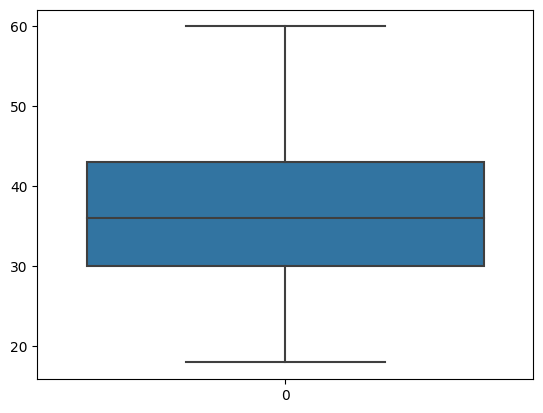

<Axes: >

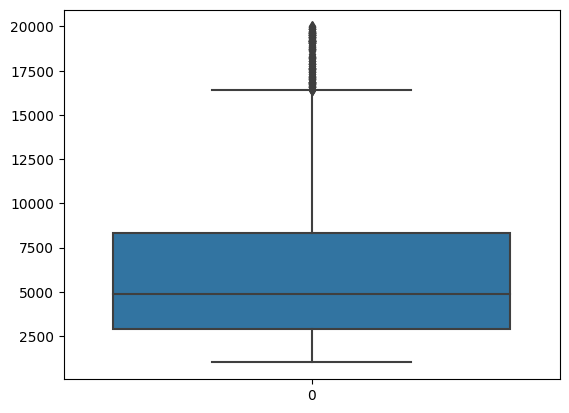

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['Age'])
plt.show()
sns.boxplot(data['MonthlyIncome'])

<Axes: >

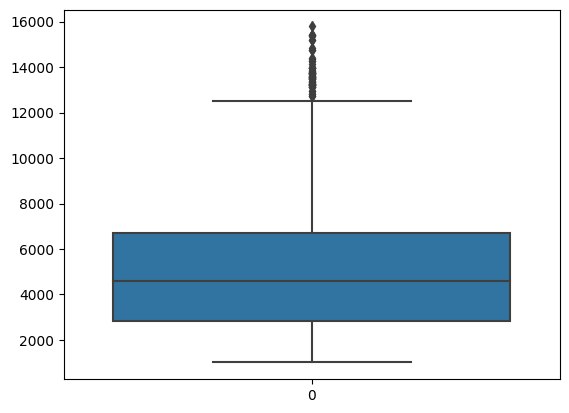

In [ ]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(data['MonthlyIncome']))
data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
sns.boxplot(data['MonthlyIncome'])

In [ ]:
X=data['Age']
Y=data['MonthlyIncome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.34,random_state=2)

In [ ]:
Training=pd.DataFrame(list(zip(X_train,Y_train)),columns=['Age','Income'])
Testing=pd.DataFrame(list(zip(X_test,Y_test)),columns=['Age','Income'])

In [ ]:
x=Training['Age']
y=Training['Income']
xmean=x.mean()
ymean=y.mean()
n=len(Training)
xy=x*y
num=xy.sum()-n*xmean*ymean
den=(x**2).sum()-n*(xmean**2)
m=num/den
c=ymean-m*xmean
print("Coefficient=",m," Intercept=",c)

Coefficient= 140.9266356506595  Intercept= 299.96980197369066


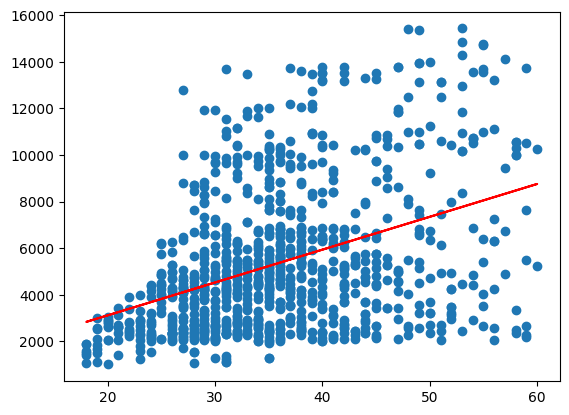

In [ ]:
best=m*x+c
Training['best']=best
Training['mean']=y.mean()
Training['error']=Training['best']-Training['Income']
plt.scatter(Training['Age'],Training['Income'])
plt.plot(Training['Age'],Training['best'],color='red')

In [ ]:
SST=sum((Training['Income']-Training['mean'])**2)
SST

9538866644.949982

In [ ]:
SSE=sum(Training['error']**2)
SSE

8010890669.45961

In [ ]:
SSR=SST-SSE
SSR

1527975975.4903717

In [ ]:
r2=SSR/SST
r2

0.16018422652960612

In [ ]:
mse=SSE/len(Training)
mse

8174378.234142459

In [ ]:
X=data[['TotalWorkingYears']]
Y=data['MonthlyRate']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.34,random_state=2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
p1=PolynomialFeatures(degree=2,include_bias=True)
x_train_p1=p1.fit_transform(X_train)
x_test_p1=p1.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model1=LinearRegression()
model1.fit(x_train_p1,Y_train)
y_predict1=model1.predict(x_test_p1)
score1=r2_score(Y_test,y_predict1)
print(score1)

0.006064603884171849


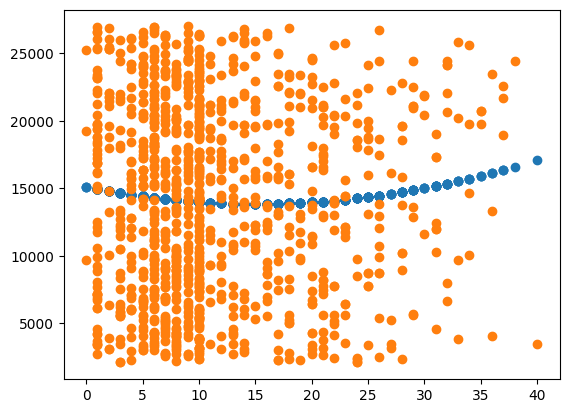

In [ ]:
plt.scatter(X_train,model1.predict(x_train_p1))
plt.scatter(X_train,Y_train)

In [ ]:
p2=PolynomialFeatures(degree=3,include_bias=True)
x_train_p2=p2.fit_transform(X_train)
x_test_p2=p2.transform(X_test)

In [ ]:
model2=LinearRegression()
model2.fit(x_train_p2,Y_train)
y_predict2=model2.predict(x_test_p2)
score2=r2_score(Y_test,y_predict2)
print(score2)

0.0076965717083493645


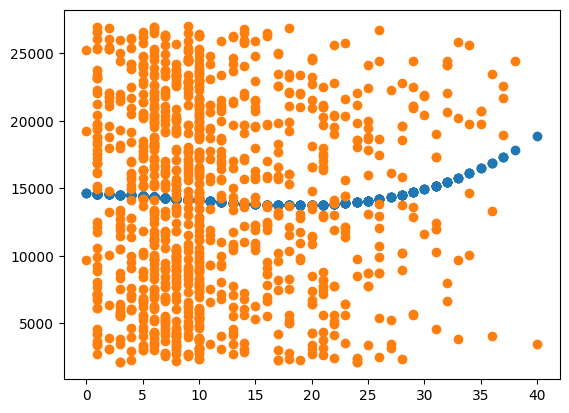

In [ ]:
plt.scatter(X_train,model2.predict(x_train_p2))
plt.scatter(X_train,Y_train)

In [ ]:
p3=PolynomialFeatures(degree=4,include_bias=True)
x_train_p3=p3.fit_transform(X_train)
x_test_p3=p3.transform(X_test)

In [ ]:
model3=LinearRegression()
model3.fit(x_train_p3,Y_train)
y_predict3=model3.predict(x_test_p3)
score3=r2_score(Y_test,y_predict3)
print(score3)

0.008688306973843929


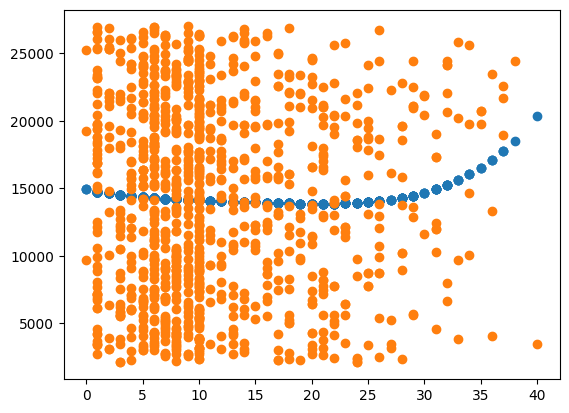

In [ ]:
plt.scatter(X_train,model3.predict(x_train_p3))
plt.scatter(X_train,Y_train)

In [ ]:
X=data[['TotalWorkingYears']]
Y=data['MonthlyIncome']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.34,random_state=2)

In [ ]:
p4=PolynomialFeatures(degree=2,include_bias=True)
x_train_p4=p4.fit_transform(X_train)
x_test_p4=p4.transform(X_test)

In [ ]:
model4=LinearRegression()
model4.fit(x_train_p4,Y_train)
y_predict4=model4.predict(x_test_p4)
score4=r2_score(Y_test,y_predict4)
print(score4)

0.6090161002008159


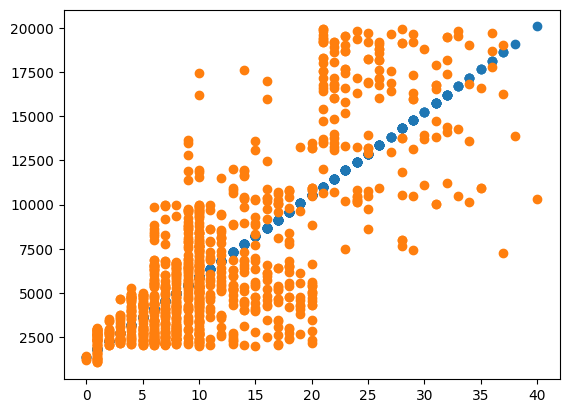

In [ ]:
plt.scatter(X_train,model4.predict(x_train_p4))
plt.scatter(X_train,Y_train)

In [ ]:
p5=PolynomialFeatures(degree=3,include_bias=True)
x_train_p5=p5.fit_transform(X_train)
x_test_p5=p5.transform(X_test)

In [ ]:
model5=LinearRegression()
model5.fit(x_train_p5,Y_train)
y_predict5=model5.predict(x_test_p5)
score5=r2_score(Y_test,y_predict5)
print(score5)

0.6097825091872786


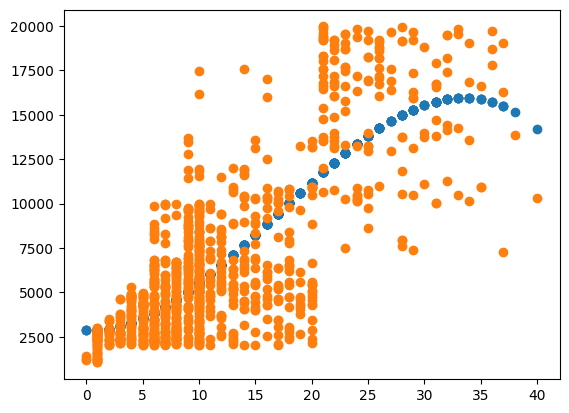

In [ ]:
plt.scatter(X_train,model5.predict(x_train_p5))
plt.scatter(X_train,Y_train)

In [ ]:
p6=PolynomialFeatures(degree=4,include_bias=True)
x_train_p6=p6.fit_transform(X_train)
x_test_p6=p6.transform(X_test)

In [ ]:
model6=LinearRegression()
model6.fit(x_train_p6,Y_train)
y_predict6=model6.predict(x_test_p6)
score6=r2_score(Y_test,y_predict6)
print(score6)

0.616091135736488


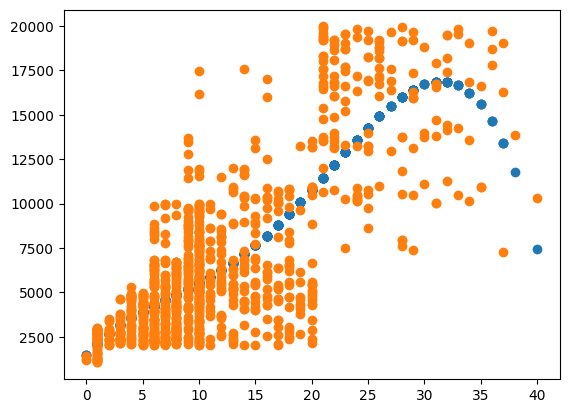

In [ ]:
plt.scatter(X_train,model6.predict(x_train_p6))
plt.scatter(X_train,Y_train)

In [ ]:
X=data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
Y=data['MonthlyRate']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                    feature        VIF
0                       Age  25.225846
1                 DailyRate   4.714719
2          DistanceFromHome   2.255816
3                HourlyRate   9.755863
4             MonthlyIncome   7.305427
5        NumCompaniesWorked   2.661190
6         PercentSalaryHike  13.247692
7         TotalWorkingYears  13.343550
8     TrainingTimesLastYear   5.252836
9            YearsAtCompany  10.302474
10       YearsInCurrentRole   6.378878
11  YearsSinceLastPromotion   2.421593
12     YearsWithCurrManager   6.509279


In [ ]:
X.drop(columns='Age',inplace=True)

<ipython-input-189-948dd1b2ec95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns='Age',inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[X.columns]=sc.fit_transform(X)
X.head()

<ipython-input-190-7141371b7e2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns]=sc.fit_transform(X)


,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.750738,-1.009046,1.415424,-0.111495,2.144383,-1.137623,-0.426346,-2.179846,-0.168100,-0.070105,-0.683622,0.243536
1,-1.292586,-0.150959,-0.220237,-0.293739,-0.673463,2.178287,-0.171459,0.145228,0.487439,0.761484,-0.372226,0.805249
2,1.423570,-0.886462,1.316293,-0.935711,1.339284,-0.032320,-0.553789,0.145228,-1.151407,-1.178891,-0.683622,-1.160749
3,1.470742,-0.763878,-0.468064,-0.762759,-0.673463,-1.137623,-0.426346,0.145228,0.159670,0.761484,0.250566,-1.160749
4,-0.517960,-0.886462,-1.261112,-0.644712,2.546933,-0.861298,-0.681232,0.145228,-0.823638,-0.624498,-0.060830,-0.599035


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.34,random_state=2)

In [ ]:
model7=LinearRegression()
model7.fit(X_train,Y_train)
y_predict7=model7.predict(X_test)
score7=r2_score(Y_test,y_predict7)
print(score7)

-0.01126651539471002


In [ ]:
adjR2=1 - (1-model7.score(X_test,Y_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
adjR2

-0.0336149466741511

In [ ]:
print(model7.coef_,model7.intercept_)

[-427.6924973   315.31259814 -352.74908439  317.66787184  -59.82156329
  -91.89794766  316.60497538   41.0442114  -597.17306428  -53.52999638
  -33.06581035 -248.85620286] 14263.838063717601


In [ ]:
X=data[['Age']]
Y=data[['MonthlyRate']]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.34,random_state=2)

In [ ]:
p8=PolynomialFeatures(degree=4,include_bias=True)
x_train_p8=p8.fit_transform(X_train)
x_test_p8=p8.transform(X_test)

In [ ]:
model8=LinearRegression()
model8.fit(x_train_p8,Y_train)
y_predict8=model8.predict(x_test_p8)
score8=r2_score(Y_test,y_predict8)
print(score8)

-0.015016563306823105


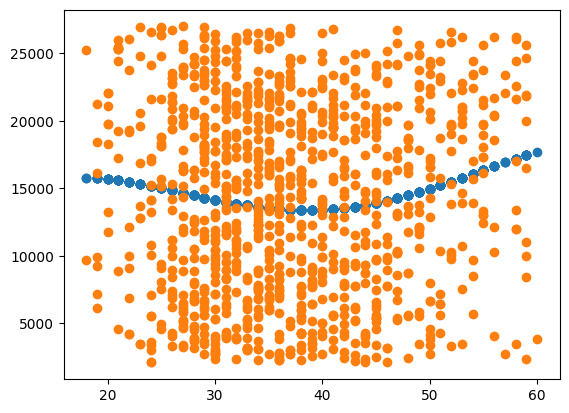

In [ ]:
plt.scatter(X_train,model8.predict(x_train_p8))
plt.scatter(X_train,Y_train)

In [ ]:
p9=PolynomialFeatures(degree=5,include_bias=True)
x_train_p9=p9.fit_transform(X_train)
x_test_p9=p9.transform(X_test)

In [ ]:
model9=LinearRegression()
model9.fit(x_train_p9,Y_train)
y_predict9=model9.predict(x_test_p9)
score9=r2_score(Y_test,y_predict9)
print(score9)

-0.010997590851605121


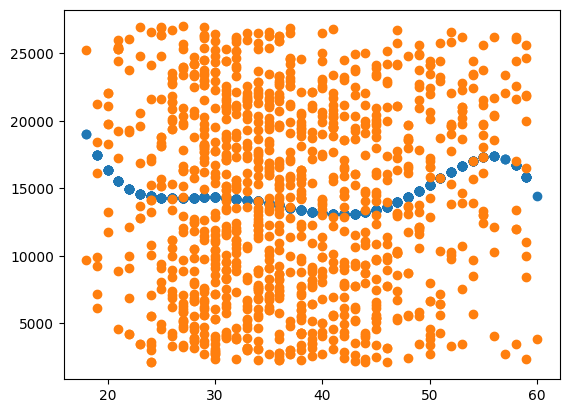

In [ ]:
plt.scatter(X_train,model9.predict(x_train_p9))
plt.scatter(X_train,Y_train)

In [ ]:
p10=PolynomialFeatures(degree=10,include_bias=True)
x_train_p10=p10.fit_transform(X_train)
x_test_p10=p10.transform(X_test)

In [ ]:
model10=LinearRegression()
model10.fit(x_train_p10,Y_train)
y_predict10=model10.predict(x_test_p10)
score10=r2_score(Y_test,y_predict10)
print(score10)

-0.011946634404809142


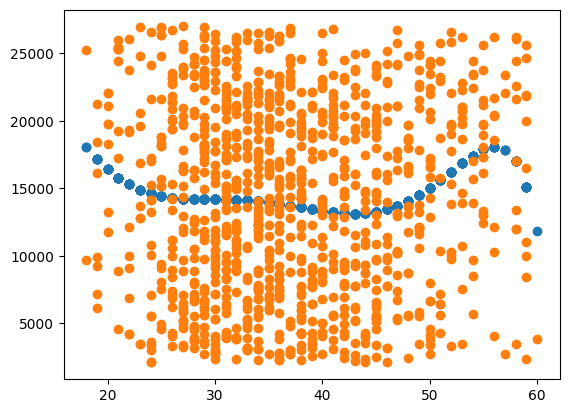

In [ ]:
plt.scatter(X_train,model10.predict(x_train_p10))
plt.scatter(X_train,Y_train)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.01,0.015,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,10,15,20,25,30,40,45,50,60,70,75,80,90,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
ridge_regressor.fit(X,Y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-51142856.1209326


In [ ]:
prediction_ridge=ridge_regressor.predict(X_test)
score11 = r2_score(Y_test, prediction_ridge)
score11

-0.0005270519867299761

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[0.01,0.015,0.02,0.025,0.03,0.04,0.05,0.075,0.09,0.1,0.15,0.2,0.25,0.5,0.75,1,5,10,20,30,45,60,75,90,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05,
                                   0.075, 0.09, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75,
                                   1, 5, 10, 20, 30, 45, 60, 75, 90, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 45}
-51142947.05963309


In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)
score12 = r2_score(Y_test, prediction_lasso)
score12

-0.0005129995914818775

In [ ]:
X=data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','NumCompaniesWorked','MonthlyRate','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
Y=data['PercentSalaryHike']

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                    feature        VIF
0                 DailyRate   4.382077
1          DistanceFromHome   2.201585
2                HourlyRate   7.501577
3             MonthlyIncome   7.310834
4        NumCompaniesWorked   2.561940
5               MonthlyRate   4.295781
6         TotalWorkingYears  10.518155
7     TrainingTimesLastYear   4.726958
8            YearsAtCompany  10.271340
9        YearsInCurrentRole   6.369172
10  YearsSinceLastPromotion   2.421307
11     YearsWithCurrManager   6.478931


In [ ]:
X.drop(columns='Age',inplace=True)

<ipython-input-180-948dd1b2ec95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns='Age',inplace=True)


<BarContainer object of 3 artists>

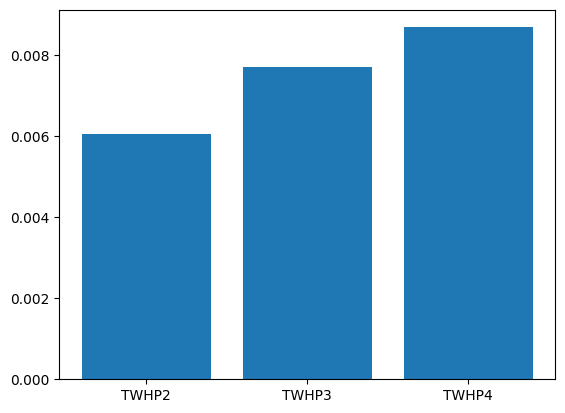

In [ ]:
x=['TWHP2','TWHP3','TWHP4']
y=[score1,score2,score3]
plt.bar(x,y)

While predicting Monthly Rate with respect to total working hours we see that using polynomial regression we get the highest r2 score for degree 4(yet model not recommended).

<BarContainer object of 6 artists>

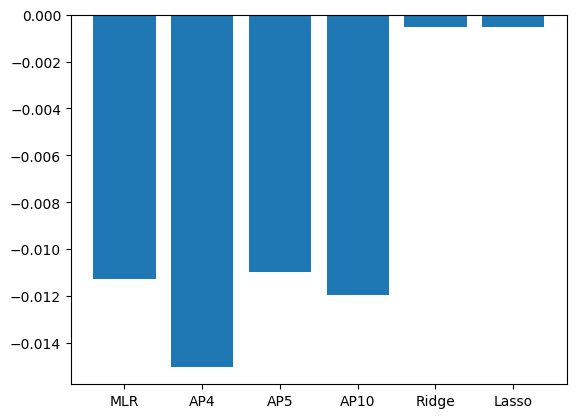

In [ ]:
x=['MLR','AP4','AP5','AP10','Ridge','Lasso']
y=[score7,score8,score9,score10,score11,score12]
plt.bar(x,y)

When we predict monthly rate with respect to age we see that all R2 scores are -ve meaning they are performing worse than mean as predicted value for all. Among these models we see that Ridge and Lasso have performed better.

<BarContainer object of 4 artists>

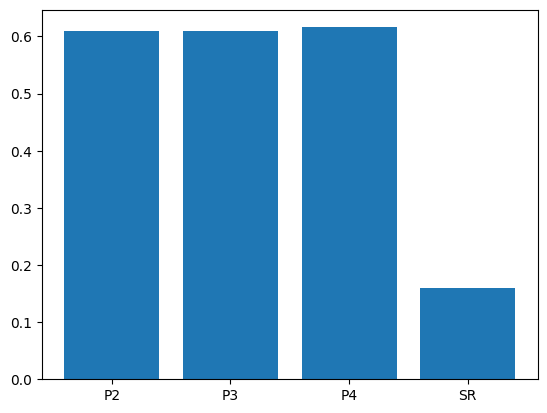

In [ ]:
x=['P2','P3','P4','SR']
y=(score4,score5,score6,r2)
plt.bar(x,y)

While predicting monthly income we see that polynomial regression has performed better than simple linear regression.